# Nguyen Van Minh - 22003405 - MidTerm - 16.03.2025

In [88]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [89]:
# Đọc file dữ liệu và kiểm tra xem có dòng nào bị thiếu dữ liệu không?
df = pd.read_csv('mpg.csv')
# Nếu có, hãy xóa những dòng đó. Có dữ liệu nào bị trùng lặp không?
# Nếu có, xử lý thế nào?
df.dropna()
df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [90]:
# Tính giá trị trung bình và trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'.
print("Mean of cylinders: ", df['cylinders'].mean())
print("Mean of horsepower: ", df['horsepower'].mean())
print("Mean of weight: ", df['weight'].mean())
print('*'*50)
print("Median of cylinders: ", df['cylinders'].median())
print("Median of horsepower: ", df['horsepower'].median())
print("Median of weight: ", df['weight'].median())
print('*'*50)

# Tìm miền giá trị (min, max) và phân vị bậc (Q1, Q3) của 'mpg'.
print("Min of mpg: ", df['mpg'].min())
print("Max of mpg: ", df['mpg'].max())
print('*'*50)
print("Q1 of mpg: ", df['mpg'].quantile(0.25))
print("Q3 of mpg: ", df['mpg'].quantile(0.75))
print('*'*50)

# Có xe nào có mức tiêu hao nhiên liệu đặc biệt cao hoặc thấp không?
print("Car with the highest mpg: \n", df[df['mpg'] == df['mpg'].max()])
print(*'*'*50)
print("Car with the lowest mpg: \n", df[df['mpg'] == df['mpg'].min()])
print('*'*50)

Mean of cylinders:  5.454773869346734
Mean of horsepower:  104.46938775510205
Mean of weight:  2970.424623115578
**************************************************
Median of cylinders:  4.0
Median of horsepower:  93.5
Median of weight:  2803.5
**************************************************
Min of mpg:  9.0
Max of mpg:  46.6
**************************************************
Q1 of mpg:  17.5
Q3 of mpg:  29.0
**************************************************
Car with the highest mpg: 
       mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   

     model_year origin       name  
322          80  japan  mazda glc  
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
Car with the lowest mpg: 
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
28  9.0          8         304.0       193.0    4732          18.5   

    model_year origin

In [91]:
# Tính mức tiêu hao nhiên liệu trung bình (mpg) của từng nhóm xe dựa trên 'origin'.
print("Mean of mpg by origin: \n", df.groupby('origin')['mpg'].mean())
print('*'*50)

# Xe từ khu vực nào có xu hướng tiêu hao ít nhiên liệu nhất?
print("Origin with the lowest mpg: \n", df.groupby('origin')['mpg'].mean().idxmin())
print('*'*50)

Mean of mpg by origin: 
 origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64
**************************************************
Origin with the lowest mpg: 
 usa
**************************************************


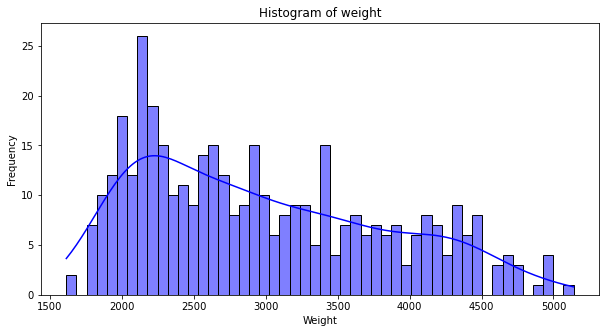

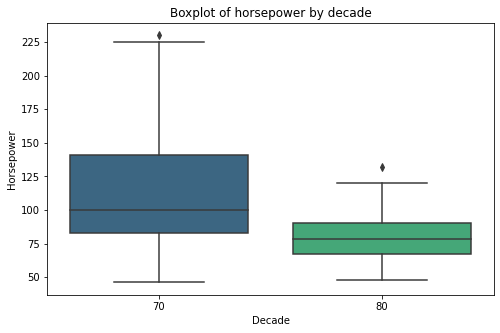

Mean horsepower by decade:
 decade
70    111.228013
80     80.058824
Name: horsepower, dtype: float64
Decade with the highest mean horsepower:  70


In [92]:
# Vẽ Histogram thể hiện sự phân bố của trọng lượng (weight) các xe.
plt.figure(figsize=(10, 5))
sns.histplot(
    df['weight'],
    bins=50,
    edgecolor='black',
    color='blue',
    alpha=0.5,
    kde=True,
)
plt.title('Histogram of weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# So sánh Boxplot của công suất (horsepower) giữa xe sản xuất trong thập niên 70 và 80.
df['decade'] = (df['model_year'] // 10) * 10
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='decade',
    y='horsepower',
    data=df,
    palette="viridis"
)
plt.title('Boxplot of horsepower by decade')
plt.xlabel('Decade')
plt.ylabel('Horsepower')
plt.show()

# Xe từ thập niên nào có công suất cao hơn?
mean_horsepower_by_decade = df.groupby('decade')['horsepower'].mean()
print("Mean horsepower by decade:\n", mean_horsepower_by_decade)
print("Decade with the highest mean horsepower: ", mean_horsepower_by_decade.idxmax())

# Nhận xét xu hướng.
# =>        Khi tính giá trị trung bình giữa thập niên 70 và 80, ta thấy rằng:
#           Từ biểu đồ boxplot, ta thấy rằng xe sản xuất trong thập niên 70 (~ 111.22)
#           có công suất cao hơn so với xe sản xuất trong thập niên 80 (~ 80.05).
#           Suy ra: thập niên 70 > 80

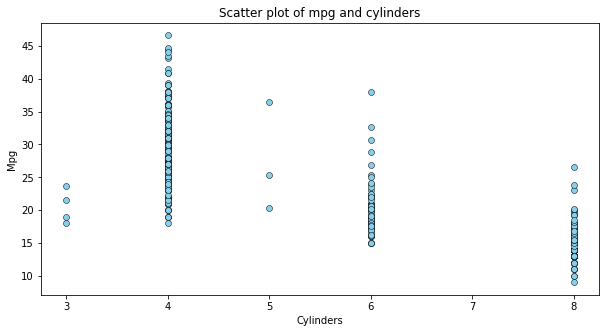

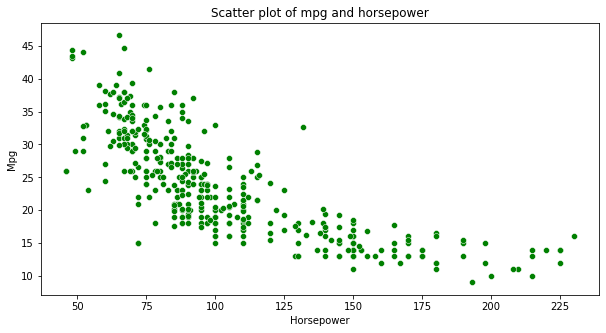

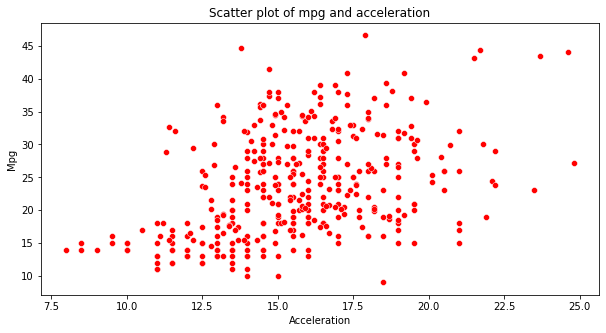

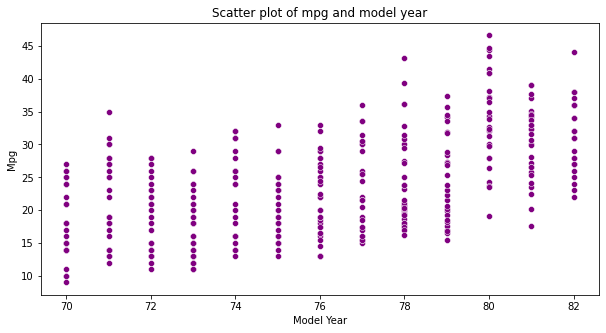

Tương quan với mpg:
 cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model_year      0.579267
decade          0.577124
Name: mpg, dtype: float64
****************************************************************************************************
Yếu tố có tương quan cao nhất với mpg:  model_year


In [93]:
# Vẽ Scatter Plot thể hiện mối quan hệ giữa 'mpg' với các yếu tố:
# Số lượng xi-lanh (cylinders), Công suất (horsepower), Gia tốc (acceleration), Năm sản xuất (model_year).

plt.figure(figsize=(10, 5))
sns.scatterplot(x='cylinders', y='mpg', data=df, color='skyblue', edgecolor='black')
plt.xlabel('Cylinders')
plt.ylabel('Mpg')
plt.title('Scatter plot of mpg and cylinders')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='horsepower', y='mpg', data=df, color='green')
plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.title('Scatter plot of mpg and horsepower')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='acceleration', y='mpg', data=df, color='red')
plt.xlabel('Acceleration')
plt.ylabel('Mpg')
plt.title('Scatter plot of mpg and acceleration')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='model_year', y='mpg', data=df, color='purple')
plt.xlabel('Model Year')
plt.ylabel('Mpg')
plt.title('Scatter plot of mpg and model year')
plt.show()

# Yếu tố nào có ảnh hưởng lớn nhất đến mức tiêu hao nhiên liệu?
correlations = df.corr()['mpg'].drop('mpg')
print("Tương quan với mpg:\n", correlations)
print('*'*100)
print("Yếu tố có tương quan cao nhất với mpg: ", correlations.idxmax())

In [94]:
# 2. Một nhà máy sản xuất vi mạch điện tử đang nghiên cứu về tỷ lệ lỗi trong sản phẩm,
# số lượng sản phẩm đạt tiêu chuẩn, cũng như thời gian hoàn thành mỗi lô hàng.
# Quá trình sản xuất được mô hình hóa bằng các phân phối xác suất phù hợp.

# a. Trung bình mỗi lô hàng có 2 lỗi sản xuất.
# Giả sử số lỗi tuân theo phân phối Poisson.
# Tính xác suất một lô hàng nhiều hơn 3 lỗi.
print('*'*100)
lambda_ = 2
prob_more_than_3 = 1 - poisson.cdf(3, lambda_)
print("a. Xác suất một lô hàng nhiều hơn 3 lỗi: ", prob_more_than_3)
print('*'*100)
# b. Mỗi lô hàng gồm 20 vi mạch, và xác suất mỗi vi mạch đạt tiêu chuẩn là 95%.
# Tính xác suất một lô hàng có chính xác 18 vi mạch đạt tiêu chuẩn.
n = 20
p = 0.95
prob_18_good = binom.pmf(18, n, p)
print("b. Xác suất một lô hàng có chính xác 18 vi mạch đạt tiêu chuẩn: ", prob_18_good)
print('*'*100)
# c. Thời gian hoàn thành một lô hàng tuân theo phân phối chuẩn, với trung bình 50 phút và độ lệch chuẩn 5 phút.
# ● Tính xác suất một lô hàng được hoàn thành trong vòng 45 phút.
mu = 50
sigma = 5
prob_within_45 = norm.cdf(45, mu, sigma)
print("c. Xác suất một lô hàng được hoàn thành trong vòng 45 phút: ", prob_within_45)
print('*'*100)
# ● Để nằm trong top 5% lô hàng sản xuất nhanh nhất, cần hoàn thành trong thời gian bao nhiêu?
time_top_5_percent = norm.ppf(0.05, mu, sigma)
print("c. Để nằm trong top 5% lô hàng sản xuất nhanh nhất, cần hoàn thành trong thời gian: ", time_top_5_percent)
print('*'*100)

****************************************************************************************************
a. Xác suất một lô hàng nhiều hơn 3 lỗi:  0.14287653950145296
****************************************************************************************************
b. Xác suất một lô hàng có chính xác 18 vi mạch đạt tiêu chuẩn:  0.18867680126765382
****************************************************************************************************
c. Xác suất một lô hàng được hoàn thành trong vòng 45 phút:  0.15865525393145707
****************************************************************************************************
c. Để nằm trong top 5% lô hàng sản xuất nhanh nhất, cần hoàn thành trong thời gian:  41.77573186524263
****************************************************************************************************
